# 7.1 언어 모델을 사용한 문장 생성

## 7.1.2 문장 생성 구현

In [2]:
import sys
sys.path.append('C:\deep-learning-from-scratch-2-master')
import numpy as np
from common.functions import softmax
from ch06.rnnlm import Rnnlm
from ch06.better_rnnlm import BetterRnnlm

class RnnlmGen(Rnnlm):
    def generate(self, start_id, skip_ids=None, sample_size=100):
        word_ids = [start_id]
        
        x = start_id
        while len(word_ids) < sample_size:
            x = np.array(x).reshape(1, 1)
            score = self.predict(x)
            p = softmax(score.flatten())
            
            sampled = np.random.choice(len(p), size=1, p=p)
            if (skip_ids is None) or (sampled not in skip_ids):
                x = sampled
                word_ids.append(int(x))
        
        return word_ids

문장 생성

In [8]:
import sys
sys.path.append('C:\deep-learning-from-scratch-2-master')
from ch07.rnnlm_gen import RnnlmGen
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
model.load_params('C:\deep-learning-from-scratch-2-master/ch06.Rnnlm.pkl')

# 시작(start) 문자와 건너뜀(skip) 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

# 문자 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

ValueError: could not broadcast input array from shape (10000,650) into shape (10000,100)

In [5]:
' '.join(['you', 'say', 'goodbye'])

'you say goodbye'

In [13]:
import sys
sys.path.append('C:\deep-learning-from-scratch-2-master')
from common.np import *
from ch07.rnnlm_gen import BetterRnnlmGen
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)


model = BetterRnnlmGen()
model.load_params('C:\deep-learning-from-scratch-2-master/ch06/BetterRnnlm.pkl')

# start 문자와 skip 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]
# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')

print(txt)

you do n't think of the horizon and theater military that he says.
 according to duty-free data will go out and others had made headquarters.
 the tale of his visit to the group in downtown chicago and the country 's province advised us that she will lock in office today.
 an investor came at running a decision that taxpayers battled buying some plans with the dorrance chain both company and u.s. technicians.
 the two executives often sell any one that might be taken over because of a settlement with the securities and exchange commission contends mr.


the meaning of life is ???

In [16]:
import sys
sys.path.append('C:\deep-learning-from-scratch-2-master')
from common.np import *
from ch07.rnnlm_gen import BetterRnnlmGen
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)


model = BetterRnnlmGen()
model.load_params('C:\deep-learning-from-scratch-2-master/ch06/BetterRnnlm.pkl')

# start 문자와 skip 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]
# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')

print(txt)


model.reset_state()

start_words = 'the meaning of life is'
start_ids = [word_to_id[w] for w in start_words.split(' ')]

for x in start_ids[:-1]:
    x = np.array(x).reshape(1, 1)
    model.predict(x)

word_ids = model.generate(start_ids[-1], skip_ids)
word_ids = start_ids[:-1] + word_ids
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print('-' * 50)
print(txt)

you can know what at a given meeting.
 messrs. fleischmann and pons are run to a fashionable red.
 jim mitchell is a crown american telephone & telegraph co. which is operating since april.
 it designed to find cosby on a scale covering the end of the month 's project unknown by the montreal d.c. goodson unit of each of the occupied drug inc.
 while aetna was unsolicited it tried to provide a number of products such as apple computer news behaved arise.
 the red delicious 's software will potentially have a classic presence on how
--------------------------------------------------
the meaning of life is in frankfurt and they are in the end of the two problems.
 that 's very nice says george miller an analyst at manufacturers hanover securities ltd.
 but the bear stearns outperformed others by the art of the public and murray big business groups despite a greater battle between campeau.
 but industry observers are the fastest-growing situation of the industry where it makes sure a deal 

# 7.2 seq2seq

## 7.2.4 덧셈 데이터셋

In [17]:
import sys
sys.path.append('C:\deep-learning-from-scratch-2-master')
from dataset import sequence
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt', seed=1984)
char_to_id, id_to_char = sequence.get_vocab()

print(x_train.shape, t_train.shape)
print(x_test.shape, t_train.shape)

print(x_train[0])
print(t_train[0])

print(''.join([id_to_char[c] for c in x_train[0]]))
print(''.join([id_to_char[c] for c in t_train[0]]))

(45000, 7) (45000, 5)
(5000, 7) (45000, 5)
[ 3  0  2  0  0 11  5]
[ 6  0 11  7  5]
71+118 
_189 


# 7.3 seq2seq 구현

## 7.3.1 Encoder 클래스

In [19]:
class Encoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn
        
        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        
        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=False)
        
        self.params = self.embed.params + self.lstm.params
        self.grads = self.embed.grads + self.lstm.grads
        self.hs = None
    
    def forward(self, xs):
        xs = self.embed.forward(xs)
        hs = self.lstm.forward(xs)
        self.hs = hs
        return hs[:, -1, :]
    
    def backward(self, dh):
        dhs = np.zeros_like(self.hs)
        dhs[:, -1, :] = dh
        
        dout = self.lstm.backward(dhs)
        dout = self.embed.backward(dout)
        return dout

## 7.3.2 Decoder 클래스

In [21]:
class Decoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn
        
        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')
        
        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)
        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads
        
    def forward(self, xs, h):
        self.lstm.set_state(h)
        
        out = self.embed.forward(xs)
        out = self.lstm.forward(out)
        score = self.affine.forward(out)
        return score
    
    def backward(self, dscore):
        dout = self.affine.backward(dscore)
        dout = self.lstm.backward(dout)
        dout = self.embed.backward(dout)
        dh = self.lstm.dh
        return dh
    
    def generate(self, h, start_id, sample_size):
        sampled = []
        sample_id = start_id
        self.lstm.set_state(h)
        
        for _ in range(sample_size):
            x = np.array(sample_id).reshape((1,1))
            out = self.embed.forward(x)
            out = self.lstm.forward(out)
            out = self.affine.forward(out)
            
            sample_id = np.argmax(score.flatten())
            sampled.append(int(sample_id))
        
        return sampled

## 7.3.3 Seq2seq 클래스

In [23]:
import sys
sys.path.append('C:\deep-learning-from-scratch-2-master')
from common.base_model import BaseModel

class Seq2seq(BaseModel):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = Decoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()
        
        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads
    
    def forward(self, xs, ts):
        decoder_xs, decoder_ts = ts[:, :-1], ts[:, 1:]
        h = self.encoder.forward(xs)
        score = self.decoder.forward(decoder_xs, h)
        loss = self.softmax.forward(score, decoder_ts)
        return loss
    
    def backward(self, dout=1):
        dout = self.softmax.backward(dout)
        dh = self.decoder.backward(dout)
        dout = self.encoder.backward(dh)
        return dout
    
    def generate(self, xs, start_id, sample_size):
        h = self.encoder.forward(xs)
        sampled = self.decoder.generate(h, start_id, sample_size)
        return sampled

# 7.3.4 seq2seq 평가

In [28]:
import sys
sys.path.append('C:\deep-learning-from-scratch-2-master')
import numpy as np
import matplotlib.pyplot as plt

from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq

# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 모델 / 옵티마이저 / 트레이너 생성
model = Seq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
               batch_size=batch_size, max_grad=max_grad)
    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct, 
                                   id_to_char, verbose)
    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 0[s] | 손실 2.53
| 에폭 1 |  반복 41 / 351 | 시간 1[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 1[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 2[s] | 손실 1.92
| 에폭 1 |  반복 101 / 351 | 시간 2[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 3[s] | 손실 1.85
| 에폭 1 |  반복 141 / 351 | 시간 3[s] | 손실 1.83
| 에폭 1 |  반복 161 / 351 | 시간 4[s] | 손실 1.79
| 에폭 1 |  반복 181 / 351 | 시간 4[s] | 손실 1.77
| 에폭 1 |  반복 201 / 351 | 시간 5[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 5[s] | 손실 1.76
| 에폭 1 |  반복 241 / 351 | 시간 6[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 6[s] | 손실 1.76
| 에폭 1 |  반복 281 / 351 | 시간 7[s] | 손실 1.75
| 에폭 1 |  반복 301 / 351 | 시간 7[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 8[s] | 손실 1.75
| 에폭 1 |  반복 341 / 351 | 시간 8[s] | 손실 1.74
Q 77+85  
T 162 
X 100 
---
Q 975+164
T 1139
X 1000
---
Q 582+84 
T 666 
X 1000
---
Q 8+155  
T 163 
X 100 
---
Q 367+55 
T 422 
X 1000
---
Q 600+257
T 857 
X 1000
---
Q 761+292
T 1053
X 1000
---
Q 830+597
T 1427
X 1000
---
Q 26+838

Q 77+85  
T 162 
X 166 
---
Q 975+164
T 1139
X 1160
---
Q 582+84 
T 666 
X 668 
---
Q 8+155  
T 163 
X 173 
---
Q 367+55 
T 422 
X 438 
---
Q 600+257
T 857 
X 873 
---
Q 761+292
T 1053
X 1073
---
Q 830+597
T 1427
X 1449
---
Q 26+838 
T 864 
X 868 
---
Q 143+93 
T 236 
X 253 
---
검증 정확도 2.880%
| 에폭 9 |  반복 1 / 351 | 시간 0[s] | 손실 1.05
| 에폭 9 |  반복 21 / 351 | 시간 0[s] | 손실 1.02
| 에폭 9 |  반복 41 / 351 | 시간 1[s] | 손실 1.00
| 에폭 9 |  반복 61 / 351 | 시간 1[s] | 손실 0.99
| 에폭 9 |  반복 81 / 351 | 시간 2[s] | 손실 0.99
| 에폭 9 |  반복 101 / 351 | 시간 3[s] | 손실 0.99
| 에폭 9 |  반복 121 / 351 | 시간 3[s] | 손실 0.99
| 에폭 9 |  반복 141 / 351 | 시간 4[s] | 손실 0.99
| 에폭 9 |  반복 161 / 351 | 시간 5[s] | 손실 1.01
| 에폭 9 |  반복 181 / 351 | 시간 5[s] | 손실 0.99
| 에폭 9 |  반복 201 / 351 | 시간 6[s] | 손실 0.98
| 에폭 9 |  반복 221 / 351 | 시간 6[s] | 손실 0.98
| 에폭 9 |  반복 241 / 351 | 시간 7[s] | 손실 0.99
| 에폭 9 |  반복 261 / 351 | 시간 8[s] | 손실 0.99
| 에폭 9 |  반복 281 / 351 | 시간 8[s] | 손실 0.98
| 에폭 9 |  반복 301 / 351 | 시간 9[s] | 손실 1.02
| 에폭 9 |  반복 321 / 351 |

| 에폭 16 |  반복 161 / 351 | 시간 5[s] | 손실 0.88
| 에폭 16 |  반복 181 / 351 | 시간 5[s] | 손실 0.87
| 에폭 16 |  반복 201 / 351 | 시간 6[s] | 손실 0.84
| 에폭 16 |  반복 221 / 351 | 시간 7[s] | 손실 0.85
| 에폭 16 |  반복 241 / 351 | 시간 7[s] | 손실 0.91
| 에폭 16 |  반복 261 / 351 | 시간 8[s] | 손실 0.88
| 에폭 16 |  반복 281 / 351 | 시간 9[s] | 손실 0.89
| 에폭 16 |  반복 301 / 351 | 시간 9[s] | 손실 0.86
| 에폭 16 |  반복 321 / 351 | 시간 10[s] | 손실 0.83
| 에폭 16 |  반복 341 / 351 | 시간 11[s] | 손실 0.85
Q 77+85  
T 162 
X 161 
---
Q 975+164
T 1139
X 1129
---
Q 582+84 
T 666 
X 667 
---
Q 8+155  
T 163 
X 158 
---
Q 367+55 
T 422 
X 419 
---
Q 600+257
T 857 
X 856 
---
Q 761+292
T 1053
X 1049
---
Q 830+597
T 1427
X 1418
---
Q 26+838 
T 864 
X 862 
---
Q 143+93 
T 236 
X 235 
---
검증 정확도 8.200%
| 에폭 17 |  반복 1 / 351 | 시간 0[s] | 손실 0.83
| 에폭 17 |  반복 21 / 351 | 시간 0[s] | 손실 0.84
| 에폭 17 |  반복 41 / 351 | 시간 1[s] | 손실 0.86
| 에폭 17 |  반복 61 / 351 | 시간 2[s] | 손실 0.88
| 에폭 17 |  반복 81 / 351 | 시간 2[s] | 손실 0.88
| 에폭 17 |  반복 101 / 351 | 시간 3[s] | 손실 0.88
| 에폭 1

검증 정확도 10.120%
| 에폭 24 |  반복 1 / 351 | 시간 0[s] | 손실 0.75
| 에폭 24 |  반복 21 / 351 | 시간 0[s] | 손실 0.81
| 에폭 24 |  반복 41 / 351 | 시간 1[s] | 손실 0.78
| 에폭 24 |  반복 61 / 351 | 시간 1[s] | 손실 0.78
| 에폭 24 |  반복 81 / 351 | 시간 2[s] | 손실 0.78
| 에폭 24 |  반복 101 / 351 | 시간 3[s] | 손실 0.77
| 에폭 24 |  반복 121 / 351 | 시간 3[s] | 손실 0.78
| 에폭 24 |  반복 141 / 351 | 시간 4[s] | 손실 0.78
| 에폭 24 |  반복 161 / 351 | 시간 5[s] | 손실 0.81
| 에폭 24 |  반복 181 / 351 | 시간 5[s] | 손실 0.77
| 에폭 24 |  반복 201 / 351 | 시간 6[s] | 손실 0.77
| 에폭 24 |  반복 221 / 351 | 시간 6[s] | 손실 0.80
| 에폭 24 |  반복 241 / 351 | 시간 7[s] | 손실 0.77
| 에폭 24 |  반복 261 / 351 | 시간 8[s] | 손실 0.77
| 에폭 24 |  반복 281 / 351 | 시간 8[s] | 손실 0.79
| 에폭 24 |  반복 301 / 351 | 시간 9[s] | 손실 0.82
| 에폭 24 |  반복 321 / 351 | 시간 10[s] | 손실 0.76
| 에폭 24 |  반복 341 / 351 | 시간 10[s] | 손실 0.77
Q 77+85  
T 162 
X 161 
---
Q 975+164
T 1139
X 1127
---
Q 582+84 
T 666 
X 655 
---
Q 8+155  
T 163 
X 167 
---
Q 367+55 
T 422 
X 415 
---
Q 600+257
T 857 
X 856 
---
Q 761+292
T 1053
X 1059
---
Q

# 7.4 seq2seq 개선

## 7.4.1 입력 데이터 반전(Reverse)

In [29]:
import sys
sys.path.append('C:\deep-learning-from-scratch-2-master')
import numpy as np
import matplotlib.pyplot as plt

from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq

# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 모델 / 옵티마이저 / 트레이너 생성
model = Seq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
               batch_size=batch_size, max_grad=max_grad)
    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct, 
                                   id_to_char, verbose)
    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 0[s] | 손실 2.52
| 에폭 1 |  반복 41 / 351 | 시간 0[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 1[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 1[s] | 손실 1.91
| 에폭 1 |  반복 101 / 351 | 시간 2[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 2[s] | 손실 1.86
| 에폭 1 |  반복 141 / 351 | 시간 3[s] | 손실 1.84
| 에폭 1 |  반복 161 / 351 | 시간 3[s] | 손실 1.80
| 에폭 1 |  반복 181 / 351 | 시간 4[s] | 손실 1.78
| 에폭 1 |  반복 201 / 351 | 시간 4[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 5[s] | 손실 1.77
| 에폭 1 |  반복 241 / 351 | 시간 5[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 6[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 6[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 7[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 7[s] | 손실 1.74
| 에폭 1 |  반복 341 / 351 | 시간 8[s] | 손실 1.73
Q   58+77
T 162 
X 100 
---
Q 461+579
T 1139
X 1000
---
Q  48+285
T 666 
X 1001
---
Q   551+8
T 163 
X 100 
---
Q  55+763
T 422 
X 1001
---
Q 752+006
T 857 
X 1000
---
Q 292+167
T 1053
X 1000
---
Q 795+038
T 1427
X 1000
---
Q  838+6

Q   58+77
T 162 
X 163 
---
Q 461+579
T 1139
X 1134
---
Q  48+285
T 666 
O 666 
---
Q   551+8
T 163 
X 162 
---
Q  55+763
T 422 
X 423 
---
Q 752+006
T 857 
X 759 
---
Q 292+167
T 1053
O 1053
---
Q 795+038
T 1427
X 1431
---
Q  838+62
T 864 
X 866 
---
Q  39+341
T 236 
X 238 
---
검증 정확도 23.080%
| 에폭 9 |  반복 1 / 351 | 시간 0[s] | 손실 0.55
| 에폭 9 |  반복 21 / 351 | 시간 0[s] | 손실 0.56
| 에폭 9 |  반복 41 / 351 | 시간 1[s] | 손실 0.56
| 에폭 9 |  반복 61 / 351 | 시간 2[s] | 손실 0.55
| 에폭 9 |  반복 81 / 351 | 시간 2[s] | 손실 0.54
| 에폭 9 |  반복 101 / 351 | 시간 3[s] | 손실 0.55
| 에폭 9 |  반복 121 / 351 | 시간 4[s] | 손실 0.55
| 에폭 9 |  반복 141 / 351 | 시간 4[s] | 손실 0.54
| 에폭 9 |  반복 161 / 351 | 시간 5[s] | 손실 0.55
| 에폭 9 |  반복 181 / 351 | 시간 6[s] | 손실 0.53
| 에폭 9 |  반복 201 / 351 | 시간 7[s] | 손실 0.54
| 에폭 9 |  반복 221 / 351 | 시간 7[s] | 손실 0.54
| 에폭 9 |  반복 241 / 351 | 시간 8[s] | 손실 0.53
| 에폭 9 |  반복 261 / 351 | 시간 9[s] | 손실 0.53
| 에폭 9 |  반복 281 / 351 | 시간 9[s] | 손실 0.54
| 에폭 9 |  반복 301 / 351 | 시간 10[s] | 손실 0.54
| 에폭 9 |  반복 321 / 351

| 에폭 16 |  반복 161 / 351 | 시간 5[s] | 손실 0.37
| 에폭 16 |  반복 181 / 351 | 시간 5[s] | 손실 0.36
| 에폭 16 |  반복 201 / 351 | 시간 6[s] | 손실 0.38
| 에폭 16 |  반복 221 / 351 | 시간 6[s] | 손실 0.38
| 에폭 16 |  반복 241 / 351 | 시간 7[s] | 손실 0.36
| 에폭 16 |  반복 261 / 351 | 시간 8[s] | 손실 0.35
| 에폭 16 |  반복 281 / 351 | 시간 8[s] | 손실 0.35
| 에폭 16 |  반복 301 / 351 | 시간 9[s] | 손실 0.35
| 에폭 16 |  반복 321 / 351 | 시간 9[s] | 손실 0.35
| 에폭 16 |  반복 341 / 351 | 시간 10[s] | 손실 0.37
Q   58+77
T 162 
O 162 
---
Q 461+579
T 1139
X 1142
---
Q  48+285
T 666 
O 666 
---
Q   551+8
T 163 
O 163 
---
Q  55+763
T 422 
O 422 
---
Q 752+006
T 857 
X 858 
---
Q 292+167
T 1053
X 1054
---
Q 795+038
T 1427
X 1430
---
Q  838+62
T 864 
O 864 
---
Q  39+341
T 236 
X 237 
---
검증 정확도 42.700%
| 에폭 17 |  반복 1 / 351 | 시간 0[s] | 손실 0.34
| 에폭 17 |  반복 21 / 351 | 시간 0[s] | 손실 0.36
| 에폭 17 |  반복 41 / 351 | 시간 1[s] | 손실 0.36
| 에폭 17 |  반복 61 / 351 | 시간 1[s] | 손실 0.35
| 에폭 17 |  반복 81 / 351 | 시간 2[s] | 손실 0.36
| 에폭 17 |  반복 101 / 351 | 시간 3[s] | 손실 0.34
| 에폭 1

검증 정확도 45.160%
| 에폭 24 |  반복 1 / 351 | 시간 0[s] | 손실 0.31
| 에폭 24 |  반복 21 / 351 | 시간 0[s] | 손실 0.29
| 에폭 24 |  반복 41 / 351 | 시간 1[s] | 손실 0.28
| 에폭 24 |  반복 61 / 351 | 시간 2[s] | 손실 0.29
| 에폭 24 |  반복 81 / 351 | 시간 3[s] | 손실 0.30
| 에폭 24 |  반복 101 / 351 | 시간 3[s] | 손실 0.29
| 에폭 24 |  반복 121 / 351 | 시간 4[s] | 손실 0.29
| 에폭 24 |  반복 141 / 351 | 시간 5[s] | 손실 0.29
| 에폭 24 |  반복 161 / 351 | 시간 5[s] | 손실 0.28
| 에폭 24 |  반복 181 / 351 | 시간 6[s] | 손실 0.29
| 에폭 24 |  반복 201 / 351 | 시간 7[s] | 손실 0.28
| 에폭 24 |  반복 221 / 351 | 시간 7[s] | 손실 0.28
| 에폭 24 |  반복 241 / 351 | 시간 8[s] | 손실 0.29
| 에폭 24 |  반복 261 / 351 | 시간 9[s] | 손실 0.29
| 에폭 24 |  반복 281 / 351 | 시간 9[s] | 손실 0.29
| 에폭 24 |  반복 301 / 351 | 시간 10[s] | 손실 0.28
| 에폭 24 |  반복 321 / 351 | 시간 11[s] | 손실 0.27
| 에폭 24 |  반복 341 / 351 | 시간 12[s] | 손실 0.29
Q   58+77
T 162 
O 162 
---
Q 461+579
T 1139
O 1139
---
Q  48+285
T 666 
O 666 
---
Q   551+8
T 163 
O 163 
---
Q  55+763
T 422 
X 421 
---
Q 752+006
T 857 
O 857 
---
Q 292+167
T 1053
X 1054
---


## 7.4.2 엿보기(Peeky)

In [30]:
class PeekyDecoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(H + D, 4 * H) / np.sqrt(H + D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H + H, V) / np.sqrt(H + H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads
        self.cache = None

    def forward(self, xs, h):
        N, T = xs.shape
        N, H = h.shape

        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        hs = np.repeat(h, T, axis=0).reshape(N, T, H)
        out = np.concatenate((hs, out), axis=2)

        out = self.lstm.forward(out)
        out = np.concatenate((hs, out), axis=2)

        score = self.affine.forward(out)
        self.cache = H
        return score

    def backward(self, dscore):
        H = self.cache

        dout = self.affine.backward(dscore)
        dout, dhs0 = dout[:, :, H:], dout[:, :, :H]
        dout = self.lstm.backward(dout)
        dembed, dhs1 = dout[:, :, H:], dout[:, :, :H]
        self.embed.backward(dembed)

        dhs = dhs0 + dhs1
        dh = self.lstm.dh + np.sum(dhs, axis=1)
        return dh

    def generate(self, h, start_id, sample_size):
        sampled = []
        char_id = start_id
        self.lstm.set_state(h)

        H = h.shape[1]
        peeky_h = h.reshape(1, 1, H)
        for _ in range(sample_size):
            x = np.array([char_id]).reshape((1, 1))
            out = self.embed.forward(x)

            out = np.concatenate((peeky_h, out), axis=2)
            out = self.lstm.forward(out)
            out = np.concatenate((peeky_h, out), axis=2)
            score = self.affine.forward(out)

            char_id = np.argmax(score.flatten())
            sampled.append(char_id)

        return sampled

In [31]:
from ch07.seq2seq import Seq2seq, Encoder

class PeekySeq2seq(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = PeekyDecoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()
        
        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

PeekySeq2seq 학습 구현

In [2]:
import sys
sys.path.append('C:\deep-learning-from-scratch-2-master')
import numpy as np
import matplotlib.pyplot as plt

from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq

# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()


# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 모델 / 옵티마이저 / 트레이너 생성
model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
               batch_size=batch_size, max_grad=max_grad)
    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct, 
                                   id_to_char, verbose)
    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.57
| 에폭 1 |  반복 21 / 351 | 시간 0[s] | 손실 2.49
| 에폭 1 |  반복 41 / 351 | 시간 1[s] | 손실 2.20
| 에폭 1 |  반복 61 / 351 | 시간 1[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 2[s] | 손실 1.84
| 에폭 1 |  반복 101 / 351 | 시간 3[s] | 손실 1.80
| 에폭 1 |  반복 121 / 351 | 시간 3[s] | 손실 1.79
| 에폭 1 |  반복 141 / 351 | 시간 4[s] | 손실 1.77
| 에폭 1 |  반복 161 / 351 | 시간 5[s] | 손실 1.77
| 에폭 1 |  반복 181 / 351 | 시간 5[s] | 손실 1.76
| 에폭 1 |  반복 201 / 351 | 시간 6[s] | 손실 1.76
| 에폭 1 |  반복 221 / 351 | 시간 7[s] | 손실 1.75
| 에폭 1 |  반복 241 / 351 | 시간 7[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 8[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 9[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 10[s] | 손실 1.73
| 에폭 1 |  반복 321 / 351 | 시간 10[s] | 손실 1.73
| 에폭 1 |  반복 341 / 351 | 시간 11[s] | 손실 1.73
Q 77+85  
T 162 
X 107 
---
Q 975+164
T 1139
X 1011
---
Q 582+84 
T 666 
X 103 
---
Q 8+155  
T 163 
X 101 
---
Q 367+55 
T 422 
X 103 
---
Q 600+257
T 857 
X 1023
---
Q 761+292
T 1053
X 1023
---
Q 830+597
T 1427
X 1011
---
Q 26+

Q 77+85  
T 162 
X 164 
---
Q 975+164
T 1139
X 1137
---
Q 582+84 
T 666 
X 665 
---
Q 8+155  
T 163 
X 160 
---
Q 367+55 
T 422 
O 422 
---
Q 600+257
T 857 
X 849 
---
Q 761+292
T 1053
X 1037
---
Q 830+597
T 1427
X 1437
---
Q 26+838 
T 864 
X 869 
---
Q 143+93 
T 236 
X 231 
---
검증 정확도 12.480%
| 에폭 9 |  반복 1 / 351 | 시간 0[s] | 손실 0.70
| 에폭 9 |  반복 21 / 351 | 시간 0[s] | 손실 0.70
| 에폭 9 |  반복 41 / 351 | 시간 1[s] | 손실 0.70
| 에폭 9 |  반복 61 / 351 | 시간 2[s] | 손실 0.70
| 에폭 9 |  반복 81 / 351 | 시간 3[s] | 손실 0.70
| 에폭 9 |  반복 101 / 351 | 시간 3[s] | 손실 0.69
| 에폭 9 |  반복 121 / 351 | 시간 4[s] | 손실 0.69
| 에폭 9 |  반복 141 / 351 | 시간 5[s] | 손실 0.68
| 에폭 9 |  반복 161 / 351 | 시간 6[s] | 손실 0.68
| 에폭 9 |  반복 181 / 351 | 시간 7[s] | 손실 0.67
| 에폭 9 |  반복 201 / 351 | 시간 7[s] | 손실 0.68
| 에폭 9 |  반복 221 / 351 | 시간 8[s] | 손실 0.67
| 에폭 9 |  반복 241 / 351 | 시간 9[s] | 손실 0.67
| 에폭 9 |  반복 261 / 351 | 시간 10[s] | 손실 0.67
| 에폭 9 |  반복 281 / 351 | 시간 11[s] | 손실 0.66
| 에폭 9 |  반복 301 / 351 | 시간 11[s] | 손실 0.66
| 에폭 9 |  반복 321 / 3

| 에폭 16 |  반복 161 / 351 | 시간 6[s] | 손실 0.43
| 에폭 16 |  반복 181 / 351 | 시간 7[s] | 손실 0.43
| 에폭 16 |  반복 201 / 351 | 시간 8[s] | 손실 0.42
| 에폭 16 |  반복 221 / 351 | 시간 9[s] | 손실 0.43
| 에폭 16 |  반복 241 / 351 | 시간 9[s] | 손실 0.44
| 에폭 16 |  반복 261 / 351 | 시간 10[s] | 손실 0.43
| 에폭 16 |  반복 281 / 351 | 시간 11[s] | 손실 0.42
| 에폭 16 |  반복 301 / 351 | 시간 12[s] | 손실 0.43
| 에폭 16 |  반복 321 / 351 | 시간 13[s] | 손실 0.45
| 에폭 16 |  반복 341 / 351 | 시간 13[s] | 손실 0.44
Q 77+85  
T 162 
X 163 
---
Q 975+164
T 1139
X 1137
---
Q 582+84 
T 666 
X 667 
---
Q 8+155  
T 163 
X 162 
---
Q 367+55 
T 422 
O 422 
---
Q 600+257
T 857 
X 856 
---
Q 761+292
T 1053
X 1048
---
Q 830+597
T 1427
X 1429
---
Q 26+838 
T 864 
O 864 
---
Q 143+93 
T 236 
O 236 
---
검증 정확도 31.180%
| 에폭 17 |  반복 1 / 351 | 시간 0[s] | 손실 0.41
| 에폭 17 |  반복 21 / 351 | 시간 0[s] | 손실 0.41
| 에폭 17 |  반복 41 / 351 | 시간 1[s] | 손실 0.41
| 에폭 17 |  반복 61 / 351 | 시간 2[s] | 손실 0.42
| 에폭 17 |  반복 81 / 351 | 시간 3[s] | 손실 0.42
| 에폭 17 |  반복 101 / 351 | 시간 3[s] | 손실 0.42
| 

검증 정확도 70.680%
| 에폭 24 |  반복 1 / 351 | 시간 0[s] | 손실 0.18
| 에폭 24 |  반복 21 / 351 | 시간 0[s] | 손실 0.18
| 에폭 24 |  반복 41 / 351 | 시간 1[s] | 손실 0.18
| 에폭 24 |  반복 61 / 351 | 시간 2[s] | 손실 0.18
| 에폭 24 |  반복 81 / 351 | 시간 2[s] | 손실 0.17
| 에폭 24 |  반복 101 / 351 | 시간 3[s] | 손실 0.18
| 에폭 24 |  반복 121 / 351 | 시간 4[s] | 손실 0.17
| 에폭 24 |  반복 141 / 351 | 시간 4[s] | 손실 0.17
| 에폭 24 |  반복 161 / 351 | 시간 5[s] | 손실 0.17
| 에폭 24 |  반복 181 / 351 | 시간 6[s] | 손실 0.18
| 에폭 24 |  반복 201 / 351 | 시간 6[s] | 손실 0.18
| 에폭 24 |  반복 221 / 351 | 시간 7[s] | 손실 0.17
| 에폭 24 |  반복 241 / 351 | 시간 8[s] | 손실 0.18
| 에폭 24 |  반복 261 / 351 | 시간 8[s] | 손실 0.18
| 에폭 24 |  반복 281 / 351 | 시간 9[s] | 손실 0.17
| 에폭 24 |  반복 301 / 351 | 시간 10[s] | 손실 0.17
| 에폭 24 |  반복 321 / 351 | 시간 10[s] | 손실 0.16
| 에폭 24 |  반복 341 / 351 | 시간 11[s] | 손실 0.16
Q 77+85  
T 162 
O 162 
---
Q 975+164
T 1139
O 1139
---
Q 582+84 
T 666 
O 666 
---
Q 8+155  
T 163 
X 164 
---
Q 367+55 
T 422 
O 422 
---
Q 600+257
T 857 
O 857 
---
Q 761+292
T 1053
X 1054
---


C:\Users\KBM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KBM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KBM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KBM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KBM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KBM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50640 missing from current font.

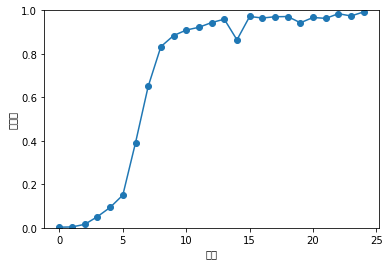

In [33]:
# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(0, 1.0)
plt.show()